In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
%matplotlib inline

In [52]:
x = np.array([5,10,15,20,25,30,35,40,45]).reshape((-1,1))
y = np.array([8,12,16,18,20,24,28,30,36])

In [53]:
print(x)
print(y)

[[ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]]
[ 8 12 16 18 20 24 28 30 36]


In [54]:
model = LinearRegression()

In [55]:
model.fit(x,y)

LinearRegression()

In [56]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [57]:
model = LinearRegression().fit(x,y)

In [58]:
r_sq = model.score(x,y)
print('coefficient of determination:',r_sq)

coefficient of determination: 0.9880658436213992


In [59]:
print('intercept:', model.intercept_)
print('slope:',model.coef_)

intercept: 4.9999999999999964
slope: [0.65333333]


In [60]:
new_model = LinearRegression().fit(x,y.reshape((-1,1)))
print('intercept:', new_model.intercept_)
print('slope:',new_model.coef_)

intercept: [5.]
slope: [[0.65333333]]


In [61]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.26666667 11.53333333 14.8        18.06666667 21.33333333 24.6
 27.86666667 31.13333333 34.4       ]


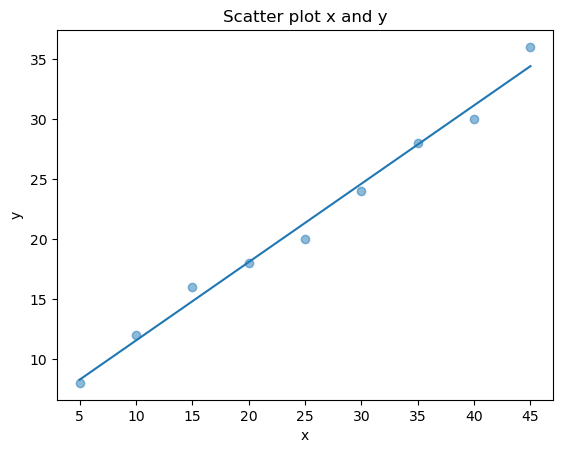

In [62]:
plt.scatter(x,y, alpha=0.5)
plt.plot(x,y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

MULTIPLE REGRESSION

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y = [4,5,20,14,32,22,38,43]
x,y = np.array(x), np.array(y)

In [64]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [65]:
model = LinearRegression().fit(x,y)

In [66]:
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.522579275198183
slope: [0.44706965 0.25502548]


In [67]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [68]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [69]:
x_new = np.arange(10).reshape((-1,2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


POLYNOMIAL REGRESSION WITH SCIKIT-LEARN

In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [71]:
x = np.array([5,10,15,20,25,30,35,40]).reshape((-1,1))
y = np.array([10,12,18,24,6,22,32, 38])

In [72]:
print(x)
print(y)

[[ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]]
[10 12 18 24  6 22 32 38]


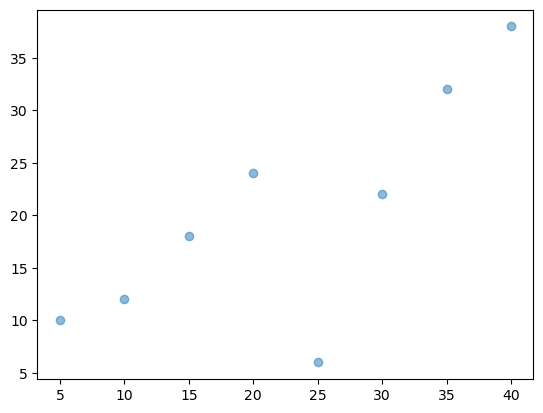

In [73]:
plt.scatter(x,y, alpha=0.5)

In [74]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [76]:
x_ = transformer.transform(x)

In [77]:
x_=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_)

[[   5.   25.]
 [  10.  100.]
 [  15.  225.]
 [  20.  400.]
 [  25.  625.]
 [  30.  900.]
 [  35. 1225.]
 [  40. 1600.]]


In [78]:
model = LinearRegression().fit(x_, y)

In [79]:
r_sq = model.score(x_,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.6724827335514357
intercept: 14.535714285714265
coefficients: [-0.48809524  0.02619048]


In [80]:
x_=PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.000e+01 1.000e+02]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.000e+01 4.000e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.000e+01 9.000e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.000e+01 1.600e+03]]


In [81]:
model = LinearRegression(fit_intercept=False).fit(x_,y)

In [82]:
r_sq = model.score(x_,y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.6724827335514358
intercept: 0.0
coefficients: [14.53571429 -0.48809524  0.02619048]


In [83]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[12.75       12.27380952 13.10714286 15.25       18.70238095 23.46428571
 29.53571429 36.91666667]


In [84]:
# Step 1 : Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a : Provide Data
x = np.array([5,10,15,20,25,30,35,40]).reshape((-1,1))
y = np.array([10,12,18,24,6,22,32, 38])

# Step 2b : Transform input data
x_=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3 : Create a model and fit it
model = LinearRegression().fit(x_,y)

# Step 4 : Get result
r_sq = model.score(x_,y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5 : Predict
y_pred = model.predict(x_)


In [85]:
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:',coefficients, sep = '\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.6724827335514357
intercept: 14.535714285714265
coefficients:
[-0.48809524  0.02619048]
predicted response:
[12.75       12.27380952 13.10714286 15.25       18.70238095 23.46428571
 29.53571429 36.91666667]


ADVANCED LINEAR REGRESSION WITH STATSMODELS

In [86]:
import numpy as np
import statsmodels.api as sm

In [87]:
x = [[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y = [4,5,20,14,32,22,38,43]
x,y = np.array(x), np.array(y)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [88]:
x = sm.add_constant(x)

In [89]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [90]:
model = sm.OLS(y,x)

In [91]:
results = model.fit()

In [92]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 02 Oct 2023   Prob (F-statistic):            0.00713
Time:                        11:18:40   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [93]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:',results.rsquared_adj)
print('regression coefficients:',results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [94]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')


predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [95]:
x_new = sm.add_constant(np.arange(10).reshape((-1,2)))
y_new = results.predict(x_new)
print(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## IMPLEMENTING LINEAR REGRESSION ON REAL DATASET 

Using Statsmodels

In [96]:
import statsmodels.api as sm
from sklearn import datasets


In [97]:
data=datasets.load_boston()
print(data.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [98]:
from sklearn.datasets import fetch_california_housing
    
data =datasets.fetch_california_housing()

In [99]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [100]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set featires names
df = pd. DataFrame(data.data,columns=data.feature_names)

# Put the target(housing value --MEDV) in another DataFrame
target = pd.DataFrame(data.target,columns=["MEDV"])

In [101]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [102]:
target.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [103]:
x = df["AveRooms"]
y = target["MEDV"]

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          4.411e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:18:52   Log-Likelihood:                         -35286.
No. Observations:               20640   AIC:                                  7.057e+04
Df Residuals:                   20639   BIC:                                  7.058e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AveRooms       0.3277      0.002    210.023      0.000       0.325       0.331
==============================================================================
Omnibus:                    21187.933   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12079513.755
Skew:                          -4.313   Prob(JB):                         0.00
Kurtosis:                     121.201   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

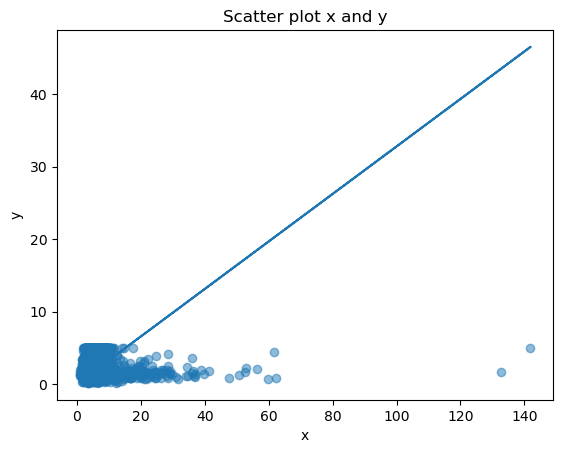

In [104]:
plt.scatter(x,y, alpha=0.5)
plt.plot(x,predictions)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using SKlearn

In [105]:
from sklearn import linear_model

In [106]:
from sklearn import datasets 

In [107]:
from sklearn.datasets import fetch_california_housing
    
data =datasets.fetch_california_housing()

In [108]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [109]:
import pandas as pd
# define the data/predictors as the pre-set featires names
df = pd.DataFrame(data.data,columns=data.feature_names)

# Put the target(housing value --MEDV) in another DataFrame
target = pd.DataFrame(data.target,columns=["MEDV"])

In [110]:
x = df
y = target ['MEDV']

In [111]:
lm = linear_model.LinearRegression()
model =lm.fit(x,y)

In [112]:
predictions = lm.predict(x)
print(predictions)

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]


In [113]:
lm.score(x,y)

0.606232685199805

Using Sklearn Ex.2

In [157]:
pip install xlrd


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [160]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_excel('Case Data.xlsx')

In [167]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [168]:
df.shape

(9426, 24)

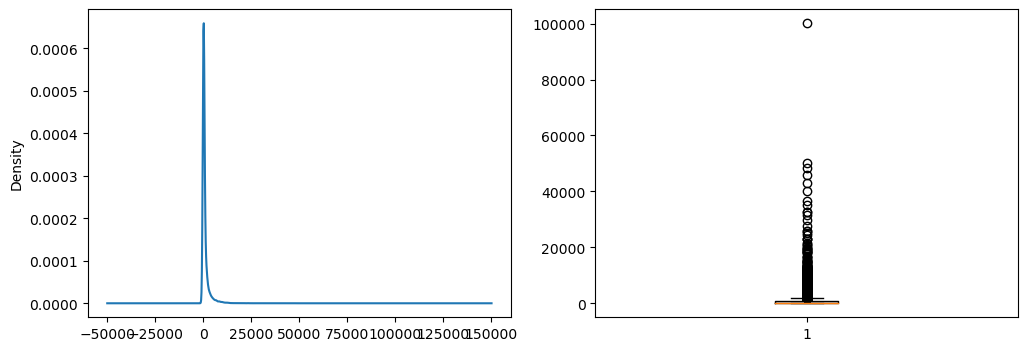

In [172]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Sales'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Sales'])
plt.show()

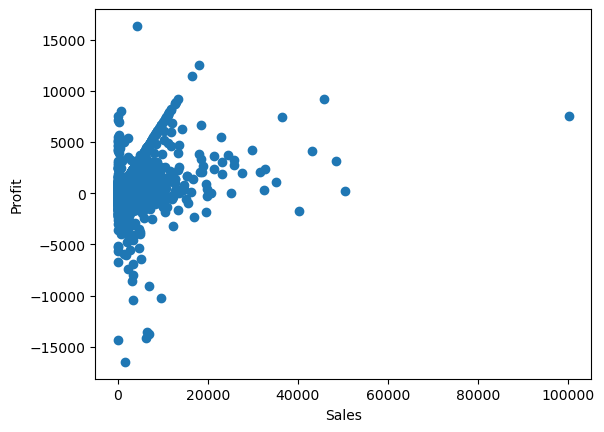

In [173]:
plt.scatter(df['Sales'], df['Profit'])

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [174]:
df.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17216\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.000912,0.007586,0.004780,0.038840,-0.002013,0.033833,-0.006431,-0.574926,-0.220454,0.918587
Discount,0.000912,1.000000,0.001099,-0.002141,-0.005723,0.006801,-0.001707,-0.039467,-0.014062,-0.021286,-0.000055
Unit Price,0.007586,0.001099,1.000000,0.246251,-0.007310,0.061917,0.023104,-0.048559,-0.054415,0.433984,0.009805
Shipping Cost,0.004780,-0.002141,0.246251,1.000000,-0.014462,0.377359,-0.003406,-0.017034,-0.020198,0.310223,0.007070
Customer ID,0.038840,-0.005723,-0.007310,-0.014462,1.000000,-0.020397,-0.086988,0.007962,-0.028248,-0.004937,0.043739
Product Base Margin,-0.002013,0.006801,0.061917,0.377359,-0.020397,1.000000,-0.004380,-0.070798,0.000205,0.117908,0.006821
Postal Code,0.033833,-0.001707,0.023104,-0.003406,-0.086988,-0.004380,1.000000,0.005364,-0.010895,-0.000176,0.037847
Profit,-0.006431,-0.039467,-0.048559,-0.017034,0.007962,-0.070798,0.005364,1.000000,0.124924,0.371583,-0.003428
Quantity ordered new,-0.574926,-0.014062,-0.054415,-0.020198,-0.028248,0.000205,-0.010895,0.124924,1.000000,0.360121,-0.599471
Sales,-0.220454,-0.021286,0.433984,0.310223,-0.004937,0.117908,-0.000176,0.371583,0.360121,1.000000,-0.228260


In [175]:
x = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [177]:
x_train.shape

(7540, 1)

In [178]:
x_test.shape

(1886, 1)

In [179]:
lin_reg =LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [184]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [185]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.13988359]]
[4.12729055]


In [186]:
lin_reg.score(x_test, y_test)

0.1483670393216543

Text(0.5, 1.0, 'Plot Sales vs Profit')

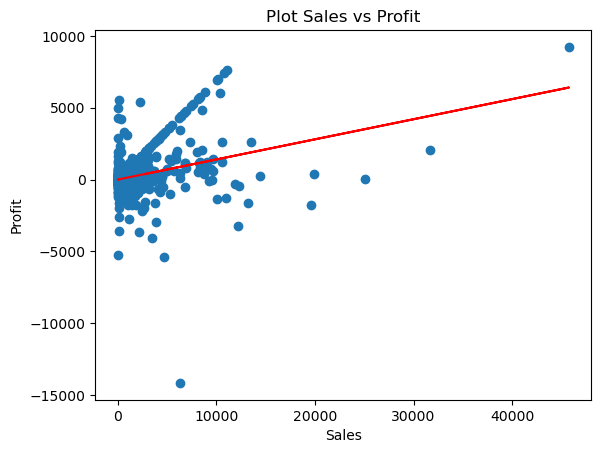

In [189]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Plot Sales vs Profit')

In [190]:
lin_reg.predict([[100]])

array([[18.11564917]])

In [191]:
lin_reg.predict([[150]])

array([[25.10982848]])

In [192]:
lin_reg.predict([[200]])

array([[32.10400779]])

In [193]:
lin_reg.predict([[250]])

array([[39.0981871]])

In [194]:
lin_reg.predict([[300]])

array([[46.09236641]])